In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import seaflowpy as sfp
import mpld3 

import glob
import matplotlib.pyplot as plt


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# set the wdirectory where the data is stored

datadir = "/Volumes/ceg/Sophie/bead_calibration/"

# select instrument
inst = 751
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.18um.evt


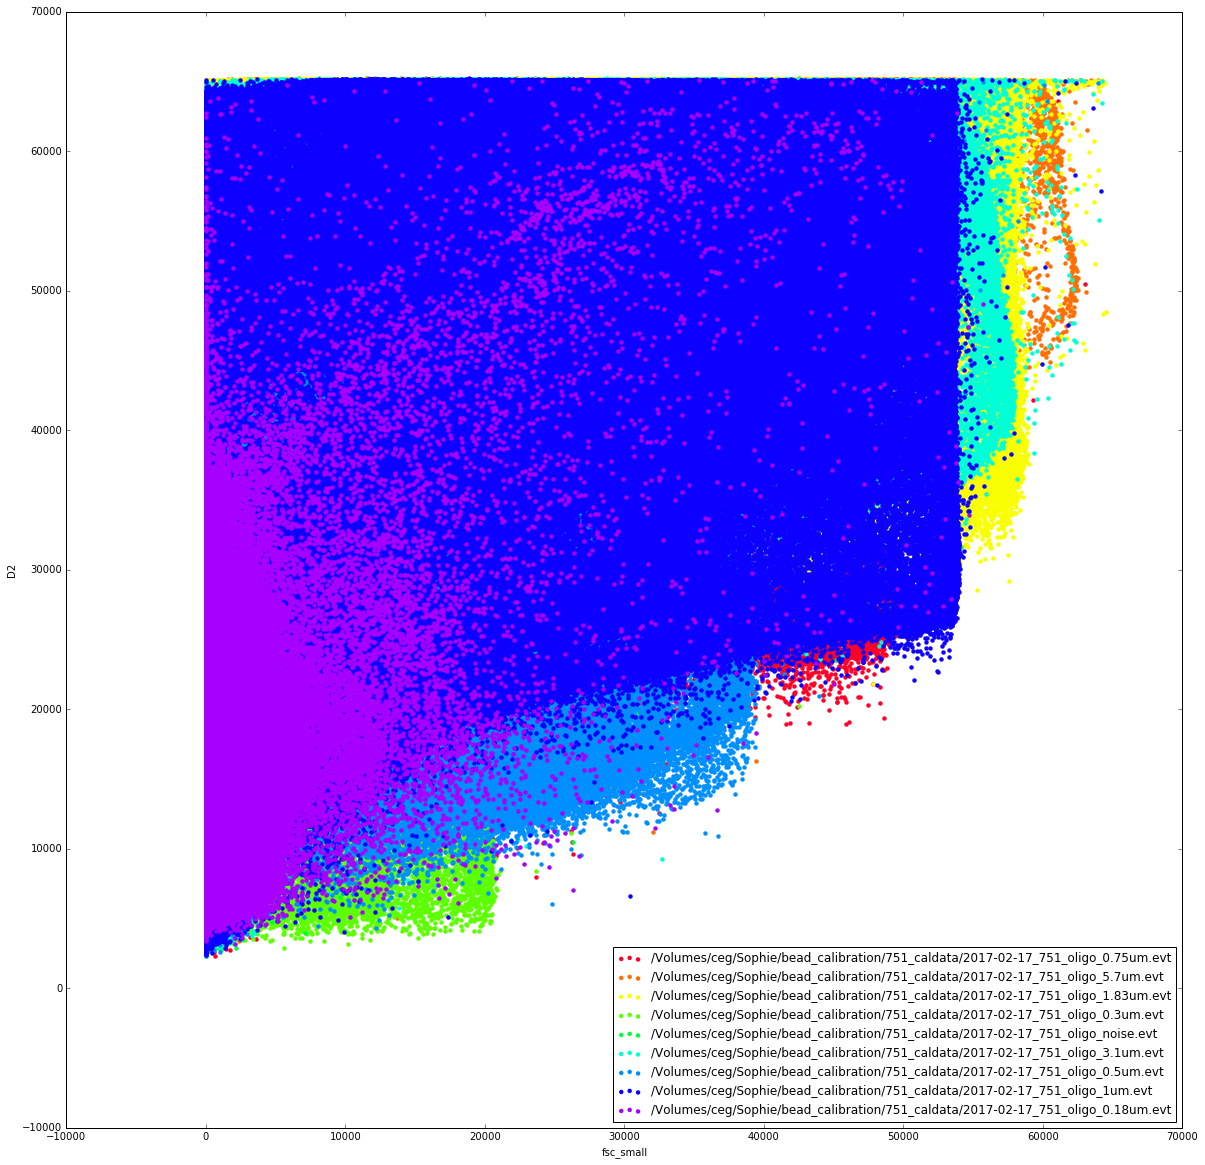

In [3]:
#% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

In [20]:
# best guess of the points needed for the filter function
# this is for the 751 oligo test
# guess = pd.DataFrame()
# guess['fsc_small'] = [0, 60000, 57000, 20000, 56600, 38000, 53000]
# guess['D2'] = [0, 49500, 34400, 5700, 39600, 17000, 26000]
# guess['bead'] = [0, 5.7, 1.83, 0.3, 3.1, 0.5, 1.0]

# try to fit a polynomial to bead data
z = np.polyfit(guess['fsc_small'], guess['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)


/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.18um.evt


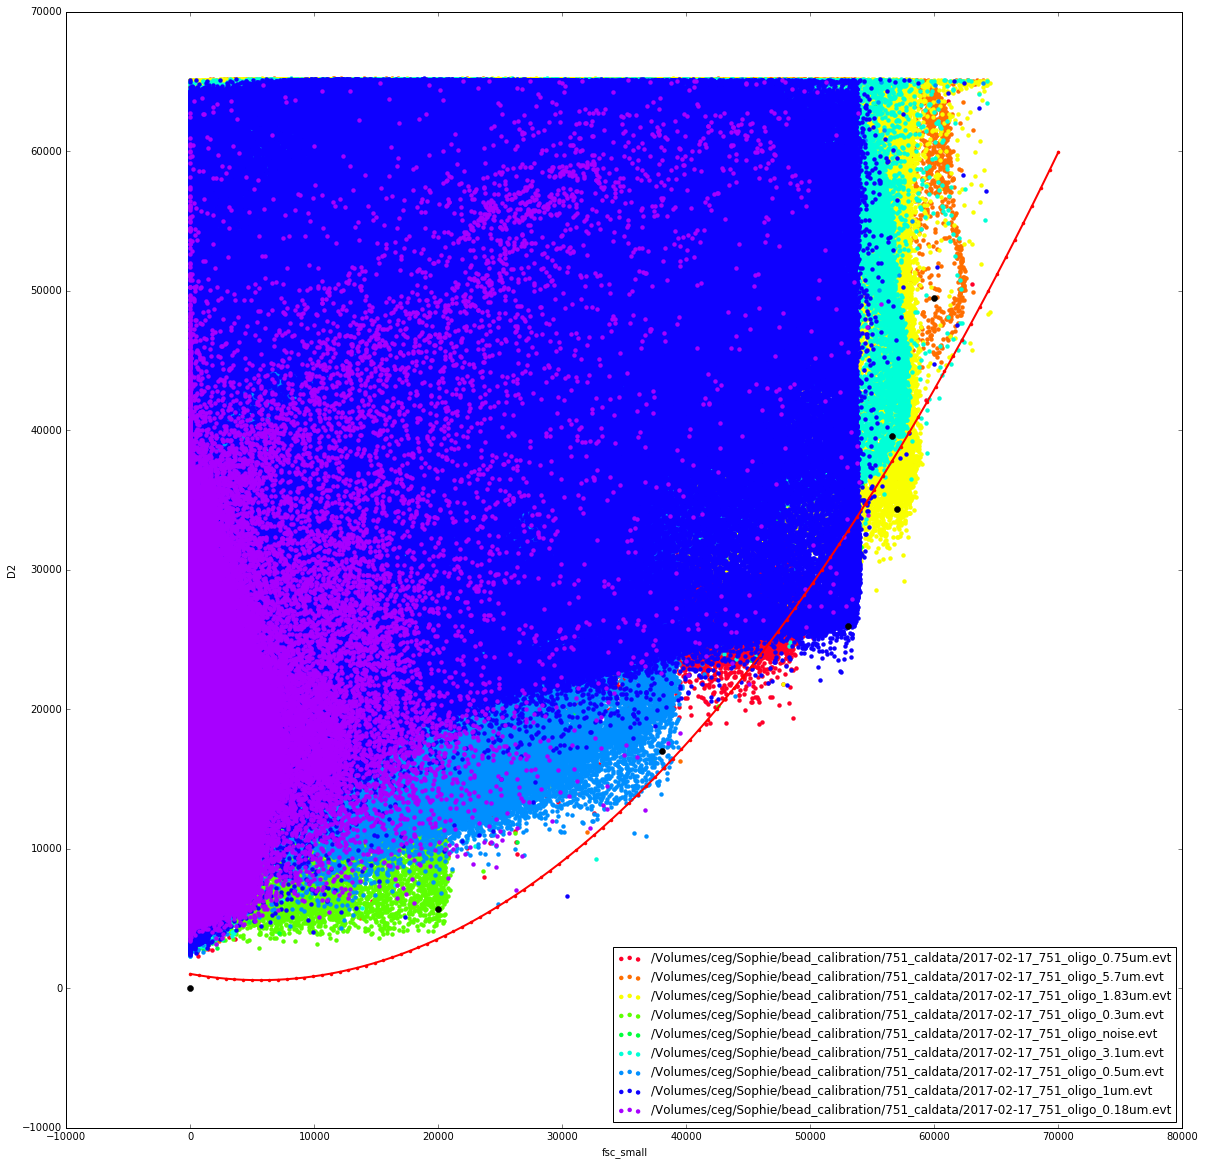

In [21]:
fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(guess['fsc_small'], guess['D2'], 'ko')
plt.show()

In [10]:
print p

           2
1.398e-05 x - 0.1371 x + 936.5
